In [1]:
!pip install opencv-python matplotlib requests


[notice] A new release of pip available: 22.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Cell 1: Imports
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests
import os

# Configure matplotlib to work in Jupyter notebook
%matplotlib inline

In [ ]:
# from google.colab import drive
import cv2
import os

# drive.mount('/content/drive')

image_path = "./s1.jpg"  

# 3. Load the image using the specified path
if os.path.exists(image_path):
    # Load the image with OpenCV
    image = cv2.imread(image_path)

    if image is None:
        print(f"Error: Failed to load image from '{image_path}'. Please check if the file is a valid image.")
    else:
        # Convert from BGR (OpenCV default) to RGB (for Matplotlib)
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        print(f"Image '{os.path.basename(image_path)}' loaded successfully from Google Drive.")
        print("Image shape:", image.shape)
else:
    print(f"Error: File not found at '{image_path}'.")
    print("Please make sure the path is correct and the file exists in your Google Drive.")



Image 's1.jpg' loaded successfully from Google Drive.
Image shape: (300, 480, 3)


In [ ]:
!pip install mpl_interactions
!pip install -q ipympl ipywidgets



[notice] A new release of pip available: 22.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
# !pip uninstall -q ipympl ipywidgets

In [6]:
# %load_ext ipympl
# %matplotlib widget


Output()

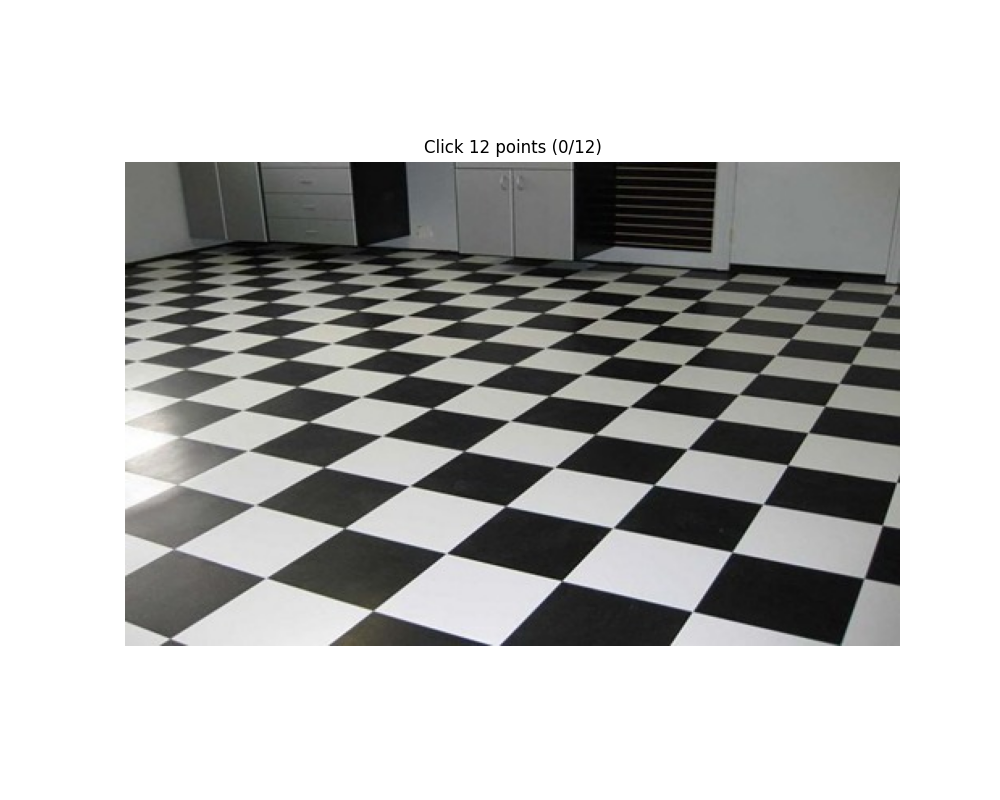

In [ ]:
import importlib, subprocess, sys
if importlib.util.find_spec("ipympl") is None:
    print("Installing ipympl…")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "-q", "ipympl"])

%matplotlib widget

import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from IPython.display import display, clear_output

# -------------------------------------------------------------------------
if 'image_rgb' not in locals() or image_rgb is None:
    raise RuntimeError("ابتدا سلول بارگذاری تصویر را اجرا کنید.")
# -------------------------------------------------------------------------

pts = []                     # نگه‌دارندهٔ نقاط

out = widgets.Output()       # برای نمایش خروجی داخل نوت‌بوک
display(out)                 # نمایش ویجت خروجی

fig, ax = plt.subplots(figsize=(10, 8)) # بزرگ‌تر کردن پنجره برای دقت بیشتر
fig.canvas.header_visible = False
fig.canvas.footer_visible = False

ax.imshow(image_rgb)
ax.set_title("Click 12 points (0/12)")
ax.axis("off")

marker, = ax.plot([], [], "rx", ms=8)     # نشانگر ضربدر

def onclick(event):
    # اگر کلیک خارج از محدوده تصویر بود، خارج شو
    if event.inaxes is not ax:
        return

    if fig.canvas.toolbar.mode != '':
        return

    if len(pts) >= 12:
        return
        
    # اگر تمام شرایط بالا برقرار بود، نقطه را ثبت کن
    pts.append((event.xdata, event.ydata))
    xs, ys = zip(*pts)
    marker.set_data(xs, ys)
    ax.set_title(f"Click 12 points ({len(pts)}/12)")
    fig.canvas.draw_idle()

    # اگر ۱۲ نقطه کامل شد، فرآیند را متوقف کن
    if len(pts) == 12:
        fig.canvas.mpl_disconnect(cid)
        with out:
            clear_output()
            print("✅ Done! 12 points selected. Coordinates:")
            print(np.array(pts, dtype=np.float32))

# اتصال تابع به رویداد کلیک ماوس
cid = fig.canvas.mpl_connect("button_press_event", onclick)

plt.show()



In [ ]:
# Cell 4: Process and Save Annotations
if len(pts) == 12:                      
    quad_corners = pts[0:4]
    
    lines = []
    for i in range(4, 12, 2):
        p1 = pts[i]
        p2 = pts[i+1]
        lines.append((p1, p2))
    lines = np.array(lines)

    np.savez('annotations.npz', quad=quad_corners, lines=lines)

    print("--- Annotations Processed and Saved ---")
    print("\nQuadrilateral Corner Coordinates:")
    print(quad_corners)
    print("\nLine Segment Coordinates (Start, End):")
    print(lines)
else:
    print(f"Error: Expected 12 points, but got {len(pts)}. Please re-run Cell 3.")


--- Annotations Processed and Saved ---

Quadrilateral Corner Coordinates:
[(np.float64(135.8193533338024), np.float64(226.96310873316483)), (np.float64(198.1586322732189), np.float64(242.8282347576253)), (np.float64(235.05827821735187), np.float64(213.73097212568075)), (np.float64(176.33463546296997), np.float64(200.6794073601903))]

Line Segment Coordinates (Start, End):
[[[209.94813041 179.18708296]
  [327.33619997 200.44979829]]

 [[238.97000924 160.21130472]
  [348.20296776 178.00094528]]

 [[301.37588104 120.74939176]
  [262.34494346 144.99496193]]

 [[392.26121661 131.80833421]
  [365.21350819 159.82456928]]]


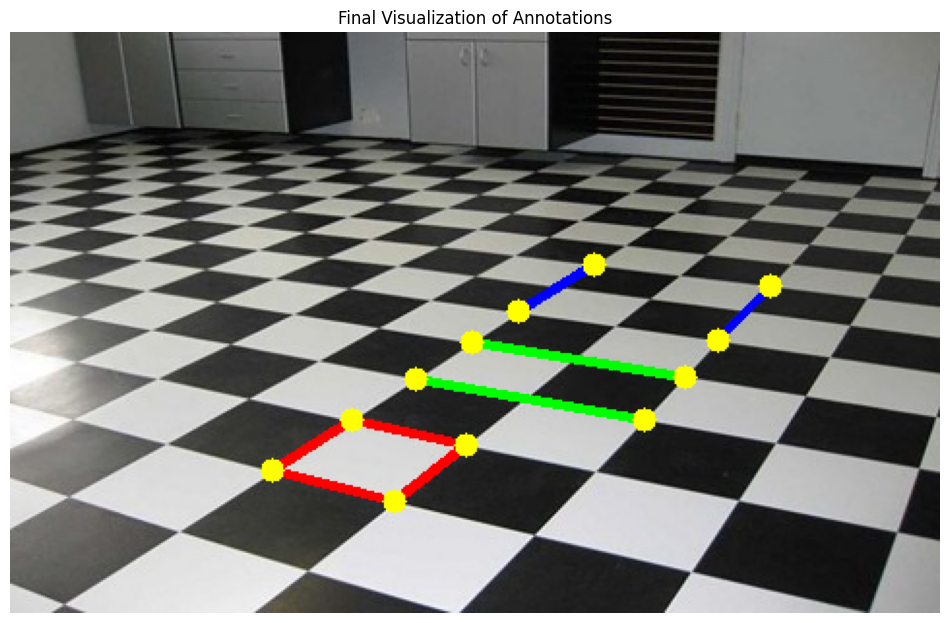

In [ ]:
# Cell 5: Final Visualization
import numpy as np
import cv2
import matplotlib.pyplot as plt

if 'quad_corners' in locals() and 'lines' in locals():
    quad_np  = np.asarray(quad_corners, dtype=np.int32)
    lines_np = np.asarray(lines,        dtype=np.int32)
    points_np = np.asarray(pts, dtype=np.int32)

    visualization_image = image_rgb.copy()

    # --- Draw the Quadrilateral ---
    pts_for_poly = quad_np.reshape((-1, 1, 2))
    cv2.polylines(
        visualization_image,
        [pts_for_poly],
        isClosed=True,
        color=(255, 0, 0),           # قرمز
        thickness=3
    )

    # --- Draw the Lines ---
    colors = [(0, 255, 0), (0, 255, 0), (0, 0, 255), (0, 0, 255)]  # سبز و آبی
    for i, (p1, p2) in enumerate(lines_np):
        cv2.line(
            visualization_image,
            tuple(p1),
            tuple(p2),
            color=colors[i],
            thickness=3
        )

    # --- Draw the Points ---
    for point in points_np:
        cv2.circle(
            visualization_image,
            tuple(point),
            radius=6,
            color=(255, 255, 0),      # زرد
            thickness=-1
        )

    # نمایش تصویر
    %matplotlib inline
    plt.figure(figsize=(12, 10))
    plt.imshow(visualization_image)
    plt.title("Final Visualization of Annotations")
    plt.axis("off")
    plt.show()
else:
    print("Annotations not found. Please run the previous cells first.")


Vanishing point 1 (homogeneous): [-1.08722970e+03 -5.57731056e+01  1.00000000e+00]
Vanishing point 2 (homogeneous): [555.09933135 -36.86070168   1.        ]
Estimated focal length  f = 616.25  pixels
Estimated focal length  f = 616.25  pixels


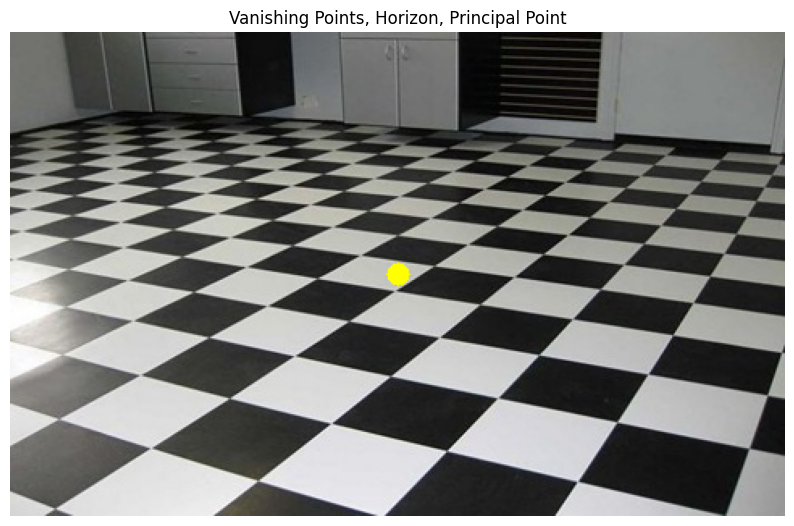

In [15]:
# Cell 6: Vanishing Points, Horizon, Focal Length (fixed)

import numpy as np
import cv2
import matplotlib.pyplot as plt

# --- 1) Vanishing Points -------------------------------------------------
def to_homog(p):
    return np.append(p, 1.0)

def line_from_points(p1, p2):
    return np.cross(to_homog(p1), to_homog(p2))   # ℓ = p1 × p2

def intersect_lines(l1, l2):
    v = np.cross(l1, l2)
    return v / v[2]                               # نرمال‌سازی به x,y,1

# دو خط موازیِ جهت ۱ و دو خطِ جهت ۲
l1_dir1 = line_from_points(lines[0, 0], lines[0, 1])
l2_dir1 = line_from_points(lines[1, 0], lines[1, 1])
l1_dir2 = line_from_points(lines[2, 0], lines[2, 1])
l2_dir2 = line_from_points(lines[3, 0], lines[3, 1])

v1 = intersect_lines(l1_dir1, l2_dir1)   # نقطهٔ گریز جهت ۱
v2 = intersect_lines(l1_dir2, l2_dir2)   # نقطهٔ گریز جهت ۲

print("Vanishing point 1 (homogeneous):", v1)
print("Vanishing point 2 (homogeneous):", v2)

# --- 2) Horizon Line -----------------------------------------------------
horizon = np.cross(v1, v2)              # خط افق ℓ_h = v1 × v2

# --- 3) Intrinsics: f با فرض cx,cy در مرکز تصویر -------------------------
h, w = image_rgb.shape[:2]
cx, cy = w / 2.0, h / 2.0

# # رابطهٔ عمود بودن: (v1-c)·(v2-c) + f² = 0
# dot = (v1[0] - cx) * (v2[0] - cx) + (v1[1] - cy) * (v2[1] - cy)
# f = np.sqrt(np.abs(dot))                # تضمین مثبت بودن داخل ریشه

v1_c = v1[:2] - np.array([cx, cy])
v2_c = v2[:2] - np.array([cx, cy])

dot = np.dot(v1_c, v2_c)

if dot >= 0:
    print("Warning: Dot product of vanishing point vectors is non-negative.")
    print("This might indicate inaccurate annotations. Using absolute value as a fallback.")
    f_squared = np.abs(dot)
else:
    f_squared = -dot

f = np.sqrt(f_squared)

print(f"Estimated focal length  f = {f:.2f}  pixels")



print(f"Estimated focal length  f = {f:.2f}  pixels")

K = np.array([[f, 0, cx],
              [0, f, cy],
              [0, 0, 1]])

# --- 4) Visualization ----------------------------------------------------
viz = image_rgb.copy()

# نقاط گریز
for p, c in zip((v1, v2), [(255, 0, 255), (0, 255, 255)]):   # صورتی و فیروزه‌ای
    cv2.circle(viz, (int(p[0]), int(p[1])), 10, c, -1)

# خط افق:  a x + b y + c = 0
a, b, c_h = horizon
eps = 1e-6
if abs(b) < eps:                       # خط افق تقریباً عمودی
    x_h = int(-c_h / a)
    cv2.line(viz, (x_h, 0), (x_h, h - 1), (0, 255, 0), 2)
else:                                  # y = -(a x + c)/b
    x0 = 0
    y0 = int(-(a * x0 + c_h) / b)
    x1 = w - 1
    y1 = int(-(a * x1 + c_h) / b)
    cv2.line(viz, (x0, y0), (x1, y1), (0, 255, 0), 2)

# مرکز تصویر (principal point)
cv2.circle(viz, (int(cx), int(cy)), 7, (255, 255, 0), -1)

plt.figure(figsize=(10, 8))
plt.imshow(viz)
plt.axis('off')
plt.title("Vanishing Points, Horizon, Principal Point")
plt.show()


Homography H:
 [[ 5.16607058e+01  5.73432701e+01  1.35819353e+02]
 [ 2.77935207e+00 -7.13244019e+00  2.26963109e+02]
 [-5.38890132e-02  9.54321195e-02  1.00000000e+00]]
Mean reprojection error: 0.00 px
Rotation matrix R:
 [[ 0.87781025  0.47880416 -0.01399092]
 [ 0.14902328 -0.30073569 -0.94199263]
 [-0.45523756  0.82480581 -0.33534184]]
Translation vector t:
 [-1.43811216  1.06240061  8.50666518]


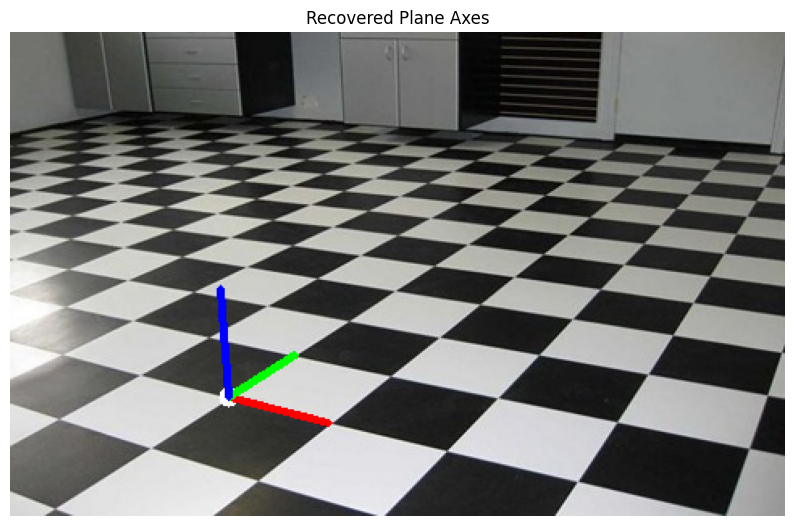

In [16]:
# Cell 7: Homography (DLT), Pose Recovery
import numpy.linalg as LA

# --- 1) نقاط تصویر و نقاط مرجع واحد ------------------------------------
img_pts  = np.asarray(quad_corners,   dtype=np.float64)      # 4×2
world_pts = np.array([[0,0],
                      [1,0],
                      [1,1],
                      [0,1]], dtype=np.float64)              # 4×2

def build_A(X, x):
    X,Y = X
    u,v = x
    return np.array([
        [-X, -Y, -1,  0,  0,  0,  u*X, u*Y, u],
        [ 0,  0,  0, -X, -Y, -1,  v*X, v*Y, v]
    ])

A = np.vstack([build_A(W, I) for W,I in zip(world_pts, img_pts)])
_,_,Vt = LA.svd(A)
H = Vt[-1].reshape(3,3) / Vt[-1,-1]

print("Homography H:\n", H)

# --- 2) خطای بازپروژکشن ---------------------------------------------------
proj = (H @ np.hstack([world_pts, np.ones((4,1))]).T).T
proj = proj[:, :2] / proj[:, 2:3]
err  = LA.norm(proj - img_pts, axis=1).mean()
print(f"Mean reprojection error: {err:.2f} px")

# --- 3) بازیابی R,t ------------------------------------------------------
H_tilde = LA.inv(K) @ H
h1, h2, h3 = H_tilde[:,0], H_tilde[:,1], H_tilde[:,2]
lam = (LA.norm(h1) + LA.norm(h2)) / 2
r1 = h1 / LA.norm(h1)
r2 = h2 / LA.norm(h2)
r3 = np.cross(r1, r2)
R = np.column_stack([r1, r2, r3])

# اورتونرمال‌سازی با SVD
U,_,Vt = LA.svd(R)
R = U @ Vt
# ===== NEW: تضمین det(R)=+1 ==============================================
if LA.det(R) < 0:               # اگر وارونه بود
    R[:, 2] *= -1               # ستون سوم را برعکس کن

t = h3 / lam

print("Rotation matrix R:\n", R)
print("Translation vector t:\n", t)

# --- 4) نمایش محورهای صفحه ----------------------------------------------
P = K @ np.column_stack([R, t])      # 3×4

axes_world = np.array([[0,0,0,1],
                       [1,0,0,1],
                       [0,1,0,1],
                       [0,0,1,1]], dtype=np.float64)  # مبدا و سه بردار واحد

proj_axes = (P @ axes_world.T).T
proj_axes = proj_axes[:,:2] / proj_axes[:,2:3]

viz2 = image_rgb.copy()
o = tuple(proj_axes[0].astype(int))
cv2.circle(viz2, o, 6, (255,255,255), -1)  # مبدا

# X قرمز
cv2.line(viz2, o, tuple(proj_axes[1].astype(int)), (255,0,0), 3)
# Y سبز
cv2.line(viz2, o, tuple(proj_axes[2].astype(int)), (0,255,0), 3)
# Z آبی
cv2.line(viz2, o, tuple(proj_axes[3].astype(int)), (0,0,255), 3)

plt.figure(figsize=(10,8)); plt.imshow(viz2); plt.axis('off')
plt.title("Recovered Plane Axes")
plt.show()


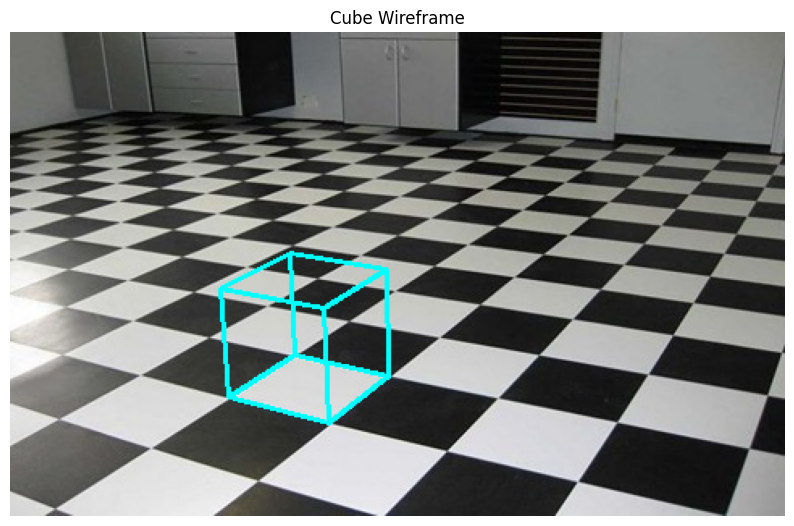

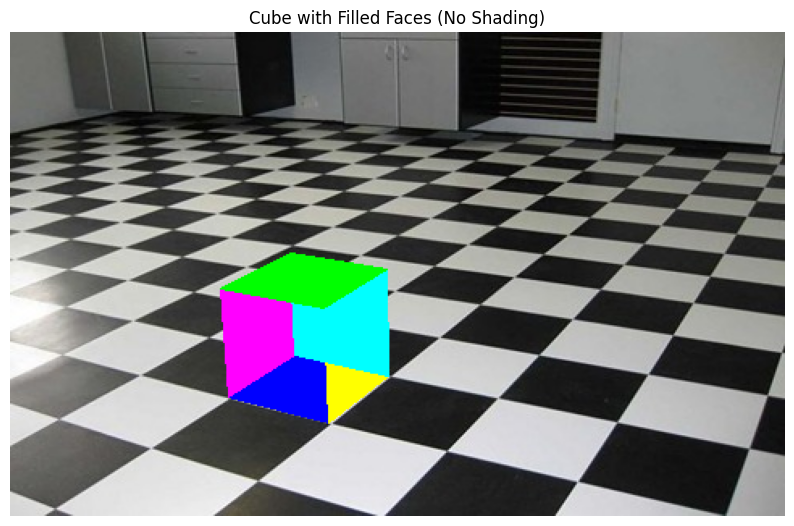

In [ ]:
# Cell 8: Cube Definition, Projection, Wireframe & Filled Faces
s = 1.0      # ارتفاع مکعب

# cube_pts_plane = np.array([
#     [0.1,0.1,0], [0.9,0.1,0], [0.9,0.9,0], [0.1,0.9,0],   
#     [0.1,0.1,s], [0.9,0.1,s], [0.9,0.9,s], [0.1,0.9,s]    
# ])  # 8×3

cube_pts_plane = np.array([
    [0, 0, 0], [1, 0, 0], [1, 1, 0], [0, 1, 0],   
    [0, 0, s], [1, 0, s], [1, 1, s], [0, 1, s]    
])

# --- 2) فرافکنی با P ------------------------------------------------------
cube_homog = np.hstack([cube_pts_plane, np.ones((8,1))])      # 8×4
proj_cube = (P @ cube_homog.T).T
proj_cube = proj_cube[:,:2] / proj_cube[:,2:3]

# --- 3) خطوط مکعب برای وایرفریم -----------------------------------------
edges = [(0,1),(1,2),(2,3),(3,0),   # پایه
         (4,5),(5,6),(6,7),(7,4),   # سقف
         (0,4),(1,5),(2,6),(3,7)]   # ستون‌ها

viz3 = image_rgb.copy()
for a,b in edges:
    cv2.line(viz3,
             tuple(proj_cube[a].astype(int)),
             tuple(proj_cube[b].astype(int)),
             (0,255,255), 2)

plt.figure(figsize=(10,8)); plt.imshow(viz3); plt.axis('off')
plt.title("Cube Wireframe")
plt.show()

faces = [
    (0,1,2,3),  # کف
    (4,5,6,7),  # سقف
    (0,1,5,4),  # ضلع جلو
    (1,2,6,5),  # راست
    (2,3,7,6),  # عقب
    (3,0,4,7),  # چپ
]

# رنگ پایه برای هر وجه
base_colors = [(255,0,0), (0,255,0), (0,0,255),
               (255,255,0), (0,255,255), (255,0,255)]

face_depth = []
for idx,face in enumerate(faces):
    zmean = proj_cube[list(face),:].mean(axis=0)[1]   # از y استفاده می‌کنیم (ساده)
    face_depth.append((zmean, idx))
face_depth.sort(reverse=True)   # painter: دورتر (y بزرگ‌تر) اول

viz4 = image_rgb.copy()
for _,idx in face_depth:
    pts2d = proj_cube[list(faces[idx]),:].astype(np.int32)
    cv2.fillConvexPoly(viz4, pts2d, base_colors[idx])

plt.figure(figsize=(10,8)); plt.imshow(viz4); plt.axis('off')
plt.title("Cube with Filled Faces (No Shading)")
plt.show()


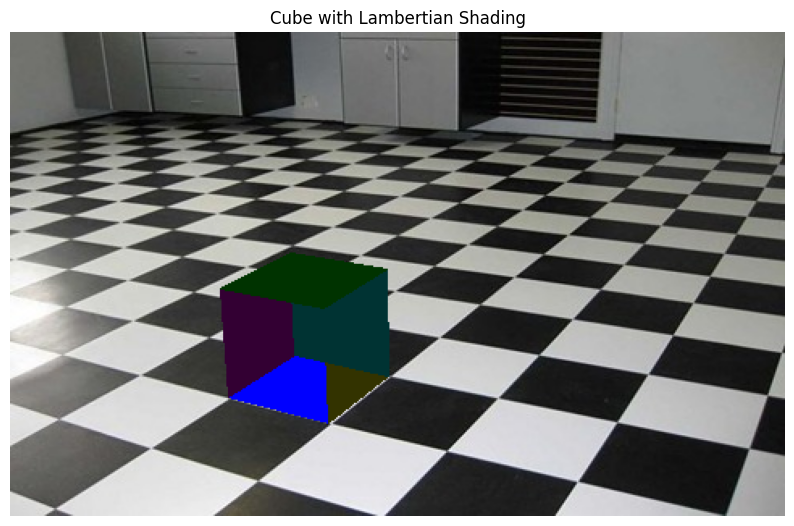

Face 0:  normal = [0. 0. 1.],  brightness = 1.00
Face 1:  normal = [0. 0. 1.],  brightness = 1.00
Face 2:  normal = [ 0. -1.  0.],  brightness = 0.20
Face 3:  normal = [1. 0. 0.],  brightness = 0.20
Face 4:  normal = [0. 1. 0.],  brightness = 0.20
Face 5:  normal = [-1.  0.  0.],  brightness = 0.20


In [ ]:
# Cell 9 : Lambertian Shading for Cube Faces  (fixed)

# جهت نور (از دوربین به صحنه)
light_dir = np.array([0, 0, -1.0])
light_dir /= np.linalg.norm(light_dir)

brightness = []
normals     = []

# 1) محاسبهٔ نرمال هر وجه و روشنی آن
for face in faces:
    v0, v1, v2 = cube_pts_plane[list(face[:3])]      # سه رأسِ اوّلِ وجه
    n      = np.cross(v1 - v0, v2 - v0)              # نرمال خام
    n_hat  = n / np.linalg.norm(n)                   # واحدسازی
    normals.append(n_hat)

    b = max(0.2, np.dot(n_hat, -light_dir))          # لامبرت: k_d = 1 ، ۰٫۲ نور محیطی
    brightness.append(b)

# 2) رندر با ترتیب Painter (از دورترین به نزدیک‌ترین)
viz5 = image_rgb.copy()

for (_, idx), b in zip(face_depth, brightness):
    # رنگ پایه × روشنایی  →  تبدیل به int معمولیِ Python
    col = np.clip(np.array(base_colors[idx]) * b, 0, 255).astype(np.uint8)
    col = tuple(int(c) for c in col)                 # تبدیل به (R,G,B) اعداد عادی

    # ۲بعدی کردن و پر کردن چندضلعی
    pts2d = proj_cube[list(faces[idx]), :].astype(np.int32)
    cv2.fillConvexPoly(viz5, pts2d, col)

plt.figure(figsize=(10, 8))
plt.imshow(viz5)
plt.axis('off')
plt.title("Cube with Lambertian Shading")
plt.show()

# 3) گزارش نرمال‌ها و میزان روشنی
for i, (n, b) in enumerate(zip(normals, brightness)):
    print(f"Face {i}:  normal = {n},  brightness = {b:.2f}")
